<div align="center"><b><font size=6>ORTA - Group Project Report<b></div>
<div align="center"><font size=6>Dial-a-ride problem (DARP) with tranfers</div>

<div align="center"><font size=5>Group's members: s313107, s319876, s332315</div>

## <ins>Introduction</ins>

The main scope of this project is to solve the DARP with transfers (DARPT), focusing on the choice and implementation of a heuristic. Since this problem has been studied in-depth and it is well-documented in literature, the mathematical modelling was skipped, concentrating instead on a precise formalization of our case of interest.

## <ins>Problem Formalization</ins>

First of all, it has to be specified that our approach for solving the DARPT is an offline one, where our a-priori knowledge of the scenario we are operating into is complete in all its aspects.

Generating an instance of our DARPT formalization regards generating specific information on three attributes of our problem:
- Passengers to be picked and brought to destination
- Transfers themselves adn their dedicated depot
- Map of the scenario, modelled as a graph

Following this order, we are now going to see thoroughly how each one of these attributes is characterized.


### <ins>1. Passengers</ins>

### <ins>2. Transfers</ins>

### <ins>3. Map of the scenario</ins>

The current number of nodes is 6


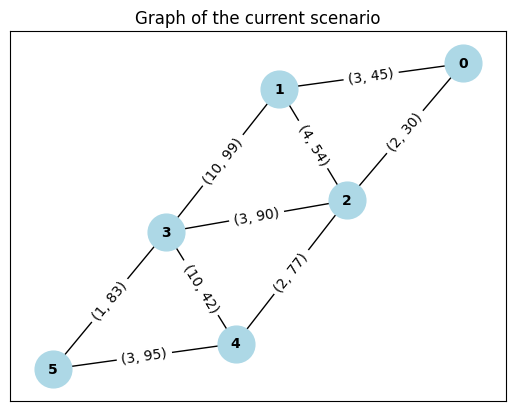

In [8]:
# Auto-reload modules for each new run
%reload_ext autoreload
# Imports 
import networkx as nx
import matplotlib.pyplot as plt
from instance_gen.instances import createGraphInstance

# Create graph according to user
G = createGraphInstance(6,1,10,20,100,2)

# Position the nodes using a layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure()
nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

# Prepare edge labels with both weights
edge_labels = {(u, v): f'({d["fuel_cost"]}, {d["time_cost"]})' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot with informative box
plt.title('Graph of the current scenario')
plt.show()

## <ins>Resolution method</ins>

### The choice of the heuristic : the Genetic algorithm

### Generation processes

#### 1 - The initial population

To generate the initial population, we state that it is sufficient to provide a "good enough" pool of individuals to start with, given that the algorithm will improve them through the generations. 
By "good enough", we mean that each individual/solution satisfies the constraints of the problem but could be far from optimal. 

Therefore, we generate the order of passengers to retrieve at random for each vehicle, ensuring that this latter is not overloaded. 

#### 2 - Fitness

To compare two individuals, we need some accurate measurements of "how good" one solution is. 

In our case, the lower the ride costs are (fuel consumption and ), the better the solution. Our fitness is thus simply computing by retrieving the costs from the graph and summing them so we get a number that we would like to be low - or at least, to decrease over the generations. 

[ TO BE COMPLETED ]

#### 3 - Selection, crossover and mutation

<b>Selection</b>

The selection process aims at selecting the most "fitted" individuals for the production of the offsprings. "Most fitted" doesn't necessarily means the ones with the best fitness because systematically keeping the best individuals would deteriorate the genetic diversity of the algorithm and we would converge towards a local optimum much more faster and thus not explore the solution space enough. 

We implemented two selection methods : the roulette wheel and the tournament selections. Both rely on the fitness but introduce different concurrency schemes. 

For the roulette wheel, we imagine a wheel on which each portion corresponds to an individual and is proportional to its quality - meaning its fitness. The better the individual, the bigger its portion on the wheel is, the more chances it has to be selectioned at each round. 
In practice, we associate each individual to a probability of getting picked and sort each individual according to them. Then, we simulate a random draw and get the desired number of individuals. 
This method is quite adapted to selection the parents because she favors the more performant individuals (the best solutions) but also leaves some chances for the less good solution to be picked. The solution space is thus not limited. 

For the tournament selection, the individuals are still selected based on their fitness but through a tournament process that runs as many times as they are individuals in the population. In each tournament, a given number of individuals are randomly selected from the population and the one with the highest fitness is selected as the winner. It is then added to a list which size should match the population size at the end of the process. 

The advantage of this approach is that it introduces selection pressure, where fitter individuals are more likely to be selected, while maintaining a diverse population by allowing random sampling and preventing duplicates. 

<b>Crossover and mutation</b>

The selectioned individuals are then used to generate new offsprings thanks to two operators : the crossover and mutation. 

For the crossover, we combine parts of two parent solutions to create a new child solution, ensuring that this latter maintains the structure and constrains of the parents. 
Two random crossver points are chosen. A slice from the first parent between the crossover points is copied to the corresonding position in the child list and the remaining slots are filled with the remaining elements from the second parent that are not already in the child. 

If we operate in a "systematic" manner on our solutions, we take the risk of converging towards a local optimum and thus not to sufficiently explore the space domain. Therefore, we introduce some randomness by modifying the genetic characteristic of an individual with a mutation operator. Even if the outcoming solutions are not better, they allow us to explore a bit more the solution space by occasionally making random changes to the solutions. 

Our mutation function introduces variability into a solution by randomly shuffling a part of it based on a given probability. 

## <ins>Results</ins>

## <ins>Conclusion</ins>

### Comments and further implementation

Looking back at what we did, a major improvement we could think of is the construction of one solution. The current modelization being very simple allows us to efficiently solve the problem without too much computational effort. However, looking at one solution, we can't really tell the path taken by each vehicle. 
For example, let's say that one solution suggests that vehicle 1 takes 4 passenger in this order : 1, 2, 3 and 4. We can't tell if the vehicle first takes passenger 1, then 2, then drops the 1 or if he takes passenger 1, drops him and then takes passenger 2. 
To have a clearer view, a post processing is necessary, involving an algorithm to find the shortest path given a starting point, a destination point, and several locations to stop by. 
Another alternative would have been to directly design a solution as a list of positions instead of a list of individuals. It would be more intuitive to the user and it would be easy to retrieve the passengers taken by each vehicle and store them in memory. 

Another improvement could be done at the fitness level. So far, we only compute the costs with two features : the cost of the fuel and the travel time. This latter is supposed to give us some information on the quality of service but a more accurate computation would be to measure the delay for each passenger, given that they expect to arrive at a certain time at their destination point. 